<link rel="stylesheet" href="../../styles/theme_style.css">
<!--link rel="stylesheet" href="../../styles/header_style.css"-->
<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/4.7.0/css/font-awesome.min.css">

<table width="100%">
    <tr>
        <td id="image_td" rowspan="4" width="15%" class="header_image_color_7"><div id="image_img" class="header_image_7"></div></td>
        <td rowspan="4" class="header_text">Train a model for detecting the fist activity using Naive Bayes</td>
        <td width="25%" colspan="2" class="special_contributors_text"><strong><span class="color11" style="font-size:15px">Special Contributors:</span></strong></td>
    </tr>
    <tr>
        <td>
            <img class="contributors_image" src="../../images/train_and_classify/emg_fist_classifier/dr_hui_liu_profile_photo.jpg">
        </td>
        <td>
            <img class="contributors_image" style="height:40%" src="../../images/train_and_classify/emg_fist_classifier/dr_lorenz_diener_profile_photo.jpg">
        </td>
    </tr>
    <tr>
        <td style="text-align:center">Hui Liu <br> <a href="mailto:hui.liu@uni-bremen.de">&#9993; hui.liu@uni-bremen.de</a></td>
        <td style="text-align:center">Lorenz Diener <br> <a href="mailto:lorenz.diener@uni-bremen.de">&#9993; lorenz.diener@uni-bremen.de</a></td>
    </tr>
    <tr>
        <td colspan="2" style="text-align:center">
            <a href="https://www.uni-bremen.de/">
                <img style="height:40%" src="../../images/train_and_classify/emg_fist_classifier/uni_bremen_logo.png">
            </a>
        </td>
    </tr>
</table>


<div id="flex-container">
    <div id="diff_level" class="flex-item">
        <strong>Difficulty Level:</strong>   <span class="fa fa-star checked"></span>
                                <span class="fa fa-star checked"></span>
                                <span class="fa fa-star checked"></span>
                                <span class="fa fa-star checked"></span>
                                <span class="fa fa-star"></span>
    </div>
    <div id="tag" class="flex-item-tag">
        <span id="tag_list">
            <table id="tag_list_table">
                <tr>
                    <td class="shield_left">Tags</td>
                    <td class="shield_right" id="tags">train_and_classify&#9729;emg&#9729;naive bayes</td>
                </tr>
            </table>
        </span>
        <!-- [OR] Visit https://img.shields.io in order to create a tag badge-->
    </div>
</div>

<strong><span class="color2">"Mathematics is everywhere!"</span></strong> &#128527; 

Despite not being the most original sentence, this idea is almost a universal truth, something that makes it the ideal candidate to start our introductory text.  

<span class="color11"><strong>Probability and Statistics</strong></span> is one prominent branch of (Applied) Mathematics identifiable in a wide range of segments of our society, ranging from the daily evaluation of future meteorological conditions to epidemiological studies while evaluating the risk that a subject presents of contracting a disease. 

With such a diversified set of possibilities and exciting opportunities, <span class="color11"><strong>Probability and Statistics</strong></span> also provide extremely important tools to computational sciences, contributing for the creation of a notable group/family of <span class="color7"><strong>Machine-learning</strong></span> algorithms based on <strong>Bayesian/probabilistic inference</strong>.

One of the simpler members of this family is the <strong><span class="color4">Naive Bayes</span></strong> classifier, which belongs to the group of <strong>supervised</strong> machine-learning algorithms supported by the <strong>Bayes Theorem</strong>, i.e., in the "assumption of conditional independence between every pair of features given the value of the class variable" (<a href="https://scikit-learn.org/stable/modules/naive_bayes.html" target="_blank">further details in scikit-learn official page <img src="../../images/icons/link.png" width="10px" height="10px" style="display:inline"></a>).

The "naive" term suits extremely well, considering that the Bayesian assumption, regarding the conditional independence between features, is commonly not true.

This <strong><span class="color13">Jupyter Notebook</span></strong> will be dedicated to present a practical application of <strong>Bayesian/probabilistic inference</strong> through the training and evaluation of a <strong><span class="color4">Naive Bayes</span></strong> classifier focused on the detection of <strong>Fist activity</strong>. 

As demonstrated in other <strong><span class="color13">Jupyter Notebooks</span></strong> belonging to <strong><span class="color7">Train and Classify</span></strong> category (<a href="../../Categories/Train_And_Classify/biosignal_classification.ipynb" target="_blank">Signal Classifier - Distinguish between EMG and ECG <img src="../../images/icons/link.png" width="10px" height="10px" style="display:inline"></a> and <a href="../../Categories/Train_And_Classify/classification_game_volume_1.ipynb" target="_blank">Rock, Paper or Scissor Game - Train and Classify <img src="../../images/icons/link.png" width="10px" height="10px" style="display:inline"></a>), machine-learning algorithms can be used to distinguish signals or identify movements, now it will be explored what they can offer while facing an event detection challenge.

<hr>

<p class="steps">1 - Import relevant packages and functions</p>

In [1]:
# Package that provides useful matrix operation methods.
import numpy as np

# Machine-learning toolbox.
from sklearn.naive_bayes import GaussianNB # For Naive Bayes modelling

# Provides useful tools to organize data into easily readable structures.
from pandas import DataFrame # For preparing the confusion matrix in text form

# Graphical package used for drawing a confusion matrix.
from seaborn import heatmap
from matplotlib.pyplot import figure, xlabel, ylabel

In [2]:
%matplotlib inline

# biosignalsnotebooks Python package containing auxiliary functions.
import biosignalsnotebooks as bsnb

<p class="steps">2 - Load and visualize the data for training and testing</p>
The EMG data which is used here was recorded by the <strong><span class="color2">biosignalsplux</span></strong> (<a href="https://biosignalsplux.com/products/kits.html" target="_blank">product kits homepage <img src="../../images/icons/link.png" width="10px" height="10px" style="display:inline"></a>) research kit. You could use other devices (e.g. <strong><span class="color4">BITalino</span></strong> - <a href="https://bitalino.com/en/" target="_blank">product homepage <img src="../../images/icons/link.png" width="10px" height="10px" style="display:inline"></a>), other sensors, or even multiple devices + sensors in advanced tasks to collect your own data.

<strong><span class="color7">Note:</span></strong> Paths given as input of the <span class="color11"><strong>NumPy</strong></span> | <strong><i><span class="color10">load</span></i></strong> function are relative to the <strong><span class="color2">biosignalsnotebooks</span></strong> project. You should adapt them in accordance to your needs! &#128521;

In [3]:
# Load data from npy file (a good format to read data in a fast way)
emg_train = np.load("../../images/train_and_classify/emg_fist_classifier/emg_train.npy")
emg_test = np.load("../../images/train_and_classify/emg_fist_classifier/emg_test.npy")

In [4]:
# Generation of time-axes.
time_train = np.linspace(0, (len(emg_train) - 1) / 1000, len(emg_train))
time_test = np.linspace(0, (len(emg_test) - 1) / 1000, len(emg_test))

# Visualize the dataset
bsnb.plot([time_train, time_test], [emg_train, emg_test], y_axis_label="Amplified EMG value (RAW)", legend_label=["EMG Train", "EMG Test"], title=["EMG signal in waveform (for training)", "EMG signal in waveform (for test)"], grid_plot=True, grid_columns=1, grid_lines=2)

<p class="steps">3 - Define the function for calculation of features based on multiple windows along the time axis</p>
The feature used in this exploratory stage was the <strong><span class="color4">bin of 120Hz</span></strong> from the whole spectral as a simple (and the only one) feature of a window.

This feature is from the spectral domain (i. e. frequency domain). Note that you could try other bins, other feature types from spectral domain  (e. g.  spectral kurtosis), features from time domain or statistical domain, or even more dimension of features - thus you will have Feature Vectors of each window.

For the specific purpose of this <strong><span class="color13">Jupyter Notebook</span></strong> it was used a window length of 1000 samples (i. e. 1 second), and an overlap of 1/4 window length (i.e. 250 samples) for feature extraction.

Different configurations could be tested for window lengths or/and overlaps to see which combination may work better.

In [5]:
def calculate_features(emg_signal, window_length = 1000, window_overlap = 1/4):
    feature_sequence = [] # Initialise the feature sequence
    window_shift = int(window_length * window_overlap)
    window_type = np.blackman(window_length) # Use blackman window for windowing the signal. You can also choose another window types

    for window_start in range(0, len(emg_signal) - window_length, window_shift): # Calculate features for each window along time axis
        windowed_signal = window_type * np.array(emg_signal[window_start:window_start + window_length]) # Get windowed data
        spectrogram = np.abs(np.fft.rfft(windowed_signal)) # Calculate magnitude Spectrogram
        feature_sequence.append([spectrogram[120]]) # Put the new calculated feature in the feature sequence.
    return(np.array(feature_sequence))

<p class="steps">4 - Generate the feature sequences of training and test data through the <span class="color2">calculate_features</span> method created before.</p>

In [6]:
# Pre-processing: signal (raw data) --> feature sequence
train_features = calculate_features(emg_train)
test_features = calculate_features(emg_test)

<p class="steps">5 - Being Naive Bayes a supervised machine-learning classifier, it is now time to define the labels for the training examples.</p>
Definition of the labels could be done in different ways, here the labels are stored in a <strong><span class="color4">.npy</span></strong> file and we simply need to load them.

<strong><span class="color7">Note:</span></strong> Paths given as input of the <span class="color11"><strong>NumPy</strong></span> | <strong><i><span class="color10">load</span></i></strong> function are relative to the <strong><span class="color2">biosignalsnotebooks</span></strong> project. You should adapt them in accordance to your needs! &#128521;

In [7]:
# Prepare the labels for training and evaluation
train_labels = np.load("../../images/train_and_classify/emg_fist_classifier/emg_train_labels.npy")
train_labels = train_labels[2:-2] # Alignment
test_labels = np.load("../../images/train_and_classify/emg_fist_classifier/emg_test_labels.npy")
test_labels = test_labels[2:-2] # Alignment

In [8]:
print("\033[1mTrain Labels:\033[0m\n " + str(train_labels))
print("\033[1mTest Labels:\033[0m\n " + str(test_labels))

Train Labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
Test Labels:
 [0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


<p class="steps">6 - Graphically visualize the feature sequences as well as the labels (references) for observation and confirmation</p>

In [9]:
from bokeh.layouts import gridplot
from bokeh.plotting import show

# Populating the plots.
sample_axis_train = np.linspace(0, len(train_features), len(train_features))
sample_axis_test = np.linspace(0, len(test_features), len(test_features))
figure_list = bsnb.plot([sample_axis_train, sample_axis_test], [np.concatenate(train_features), np.concatenate(test_features)], grid_plot=True, grid_columns=1, grid_lines=2,
                        y_axis_label="Magnitude (RAW)", x_axis_label="Frame Number", legend_label=["Feature Sequence", "Feature Sequence"], 
                        title=["Feature sequence of training data: bin of 120Hz in Spectral magnitude", "Feature sequence of test data: bin of 120Hz in Spectral magnitude"],
                        show_plot=False, get_fig_list=True)

# Adding the labels time-series.
figure_list[0].line(sample_axis_train, train_labels * 700, legend_label="Labels of fist activity", **bsnb.opensignals_kwargs("line")) # TRAINING
figure_list[1].line(sample_axis_test, test_labels * 700, legend_label="Labels of fist activity", **bsnb.opensignals_kwargs("line")) # TEST

# Visualize the feature sequences
grid_plot = gridplot([[figure_list[0]], [figure_list[1]]], **bsnb.opensignals_kwargs("gridplot"))
show(grid_plot)

<p class="steps">7 - Train a basic Naive Bayes model using the feature sequence of the training data</p>

In [10]:
basic_gaussian_classifier = GaussianNB()
basic_gaussian_classifier.fit(train_features, train_labels)

GaussianNB()

<p class="steps">8 - Define the function to draw confusion matrix in order to evaluate the performance of the trained classifier</p>

In [11]:
def draw_confusion_matrix(prediction, references):
    # Prepare statistics of confusion matrix
    confusion_matrix = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
    for i in range(0, len(prediction)):
        confusion_matrix[prediction[i]][references[i]] += 1
    
    # Draw confusion matrix
    dataframe = DataFrame(confusion_matrix, index = [0, 1, 2], columns = [0, 1, 2])
    print ("\n\033[1mConfusion Matrix (text form):\033[0m\n")
    print (dataframe)
    print ("\n\033[1mConfusion Matrix (figure):\033[0m")
    figure(figsize = (5, 4.5))
    heatmap(dataframe, annot=True)
    ylabel("Prediction")
    xlabel("Reference")

<p class="steps">9 - Use the trained Naive Bayes model to decode the test data and evaluate its performance</p>


Accuracy: 0.8981481481481481

Confusion Matrix (text form):

    0   1   2
0  61   1   0
1   1  17   5
2   0   4  19

Confusion Matrix (figure):


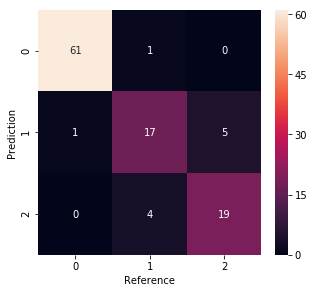

In [12]:
# Show the accuracy of the classifier considering its score property.
print("\nAccuracy: " + str(basic_gaussian_classifier.score(test_features, test_labels)))

# Request classifier a prediction regarding the areas of fist activity in the test data.
prediction = basic_gaussian_classifier.predict(test_features)

# Draw a confusion matrix to compare the prediction with the expected fist activity envelope.
draw_confusion_matrix(prediction, test_labels)

The accuracy/score of the classifier is very reasonable (89.81%) and the confusion matrix demonstrates that the great majority of the obtained prediction meet the expected result (considering the concentration of values in the top-left to bottom-right diagonal).

<p class="steps">10 - Upgrade the algorithm: use stacking</p>
Through the <strong><span class="color7">stacking</span></strong> technique a meta-classifier is created, combining multiple classification models or information sources to improve the prediction capabilities of the original model (for more information regarding <strong><span class="color7">stacking</span></strong> and ensemble learning, please, visit: <a href="https://blog.statsbot.co/ensemble-learning-d1dcd548e936">https://blog.statsbot.co/ensemble-learning-d1dcd548e936</a>).

For our specific case, features extracted from multiple windows are combined in a single feature vector (stacked features).

Here it is used a context length of 2, i.e for each window a 5-dimensional feature vector is generated:

\begin{equation}
[120Hz\; Bin(Window[i-2]), 120Hz\; Bin(Window[i-1]), 120Hz\; Bin(Window[i]), 120Hz\; Bin(Window[i+1]), 120Hz\; Bin(Window[i+2])]
\end{equation}

It should begin with $Window[2]$.

In [13]:
# You could test different combinations
context_length = 2

def stack_features(features, labels, context_length):
    stacked_features = []
    aligned_labels = []
    for window_start in range(0, len(features) - (context_length * 2 + 1)):
        stacked_feature_vector = features[window_start:window_start + context_length * 2 + 1, :]
        stacked_features.append(stacked_feature_vector.flatten())
        aligned_labels.append(labels[window_start + context_length])
    return(np.array(stacked_features), np.array(aligned_labels))

stacked_train_features, aligned_train_labels = stack_features(train_features, train_labels, context_length)
stacked_test_features, aligned_test_labels = stack_features(test_features, test_labels, context_length)

<p class="steps">11 - Train a Naive Bayes model using the feature vector sequence of the stacked features</p>

In [14]:
upgraded_gaussian_classifier = GaussianNB()
upgraded_gaussian_classifier.fit(stacked_train_features, aligned_train_labels)

GaussianNB()

<p class="steps">12 - Use the new trained Naive Bayes model to decode the test data and evaluate</p>

Accuracy: 0.9611650485436893

Confusion Matrix (text form):

    0   1   2
0  53   0   0
1   2  22   0
2   2   0  24

Confusion Matrix (figure):


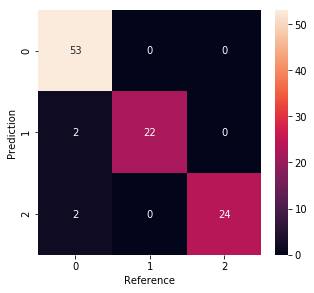

In [15]:
# Show the accuracy of the classifier considering its score property.
print("Accuracy: " + str(upgraded_gaussian_classifier.score(stacked_test_features, aligned_test_labels)))

# Request classifier a prediction regarding the areas of fist activity in the test data.
prediction = upgraded_gaussian_classifier.predict(stacked_test_features)

# Draw a confusion matrix to compare the prediction with the expected fist activity envelope.
draw_confusion_matrix(prediction, aligned_test_labels)

As demonstrated by the previous evaluation (accuracy estimate and confusion matrix generation) the performance of the "stacked" classifier greatly improves, reaching the 96.12% of accuracy!

After a diversified set of challenges, our journey through <strong><span class="color4">Naive Bayes</span></strong> classifiers reaches the conclusive point.

In this <strong><span class="color13">Jupyter Notebook</span></strong> you had the opportunity to explore a new classification algorithm and also how to improve the performance of the trained model through stacking.

<strong><span class="color7">We hope that you have enjoyed this guide. </span><span class="color2">biosignalsnotebooks</span><span class="color4"> is an environment in continuous expansion, so don't stop your journey and learn more with the remaining <a href="../MainFiles/biosignalsnotebooks.ipynb">Notebooks <img src="../../images/icons/link.png" width="10px" height="10px" style="display:inline"></a></span></strong> ! 

<span class="color6"><strong>Auxiliary Code Segment (should not be replicated by the user)</strong></span>

In [16]:
from biosignalsnotebooks.__notebook_support__ import css_style_apply
css_style_apply()

.................... CSS Style Applied to Jupyter Notebook .........................


In [17]:
%%html
<script>
    // AUTORUN ALL CELLS ON NOTEBOOK-LOAD!
    require(
        ['base/js/namespace', 'jquery'],
        function(jupyter, $) {
            $(jupyter.events).on("kernel_ready.Kernel", function () {
                console.log("Auto-running all cells-below...");
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
            });
        }
    );
</script>